# 01. Basic Example
A simple example on how to use the FDTD Library

## Imports

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/bij/Projects/fdtd/')
import fdtd
import fdtd.backend as bd

## Set Backend

In [2]:
fdtd.set_backend("torch")

## Constants

In [3]:
WAVELENGTH = 1550e-9
SPEED_LIGHT: float = 299_792_458.0  # [m/s] speed of light

## Simulation

create FDTD Grid

In [4]:
grid = fdtd.Grid(
    (2.5e-5, 1.5e-5, 1),
    grid_spacing=0.01 * WAVELENGTH,
    permittivity=1.0,
    permeability=1.0,
)

boundaries

In [5]:
# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

grid[:, :, 0] = fdtd.PeriodicBoundary(name="zbounds")

sources

In [6]:
grid[50, :, 0] = fdtd.LineSource(
    period=WAVELENGTH / SPEED_LIGHT, name="linesource"
)
#grid[50, 50, 0] = fdtd.PointSource(
#    period=WAVELENGTH / SPEED_LIGHT, name="pointsource"
#)

#grid[100, 60, 0] = fdtd.PointSource(
#    period=WAVELENGTH / SPEED_LIGHT, name="pointsource",
#)

detectors

In [7]:
grid[40, :, 0] = fdtd.LineDetector(name="detector")
grid[:, 75, 0] = fdtd.LineDetector(name="detector2")
grid[60, :, 0] = fdtd.LineDetector(name="detector3")

objects

In [8]:
#grid[100:105, :, 0:1] = fdtd.AnisotropicObject(permittivity=2.5, name="object")

## Run simulation

In [9]:
grid.run(200, progress_bar=False)

## Visualization

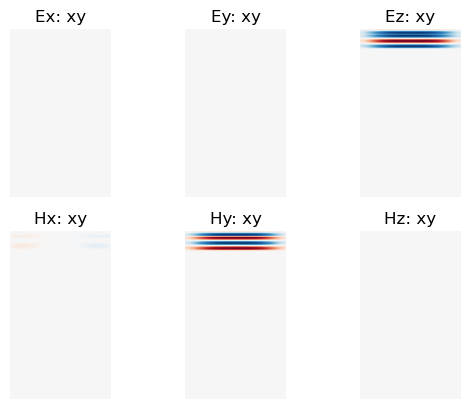

In [10]:
fig, axes = plt.subplots(2, 3, squeeze=False)
titles = ["Ex: xy", "Ey: xy", "Ez: xy", "Hx: xy", "Hy: xy", "Hz: xy"]

fields = bd.stack(
    [
        grid.E[:, :, 0, 0],
        grid.E[:, :, 0, 1],
        grid.E[:, :, 0, 2],
        grid.H[:, :, 0, 0],
        grid.H[:, :, 0, 1],
        grid.H[:, :, 0, 2],
    ]
)

m = max(abs(fields.min().item()), abs(fields.max().item()))

for ax, field, title in zip(axes.ravel(), fields, titles):
    ax.set_axis_off()
    ax.set_title(title)
    ax.imshow(bd.numpy(field), vmin=-m, vmax=m, cmap="RdBu")

plt.show()

Emax:  tensor(9.7929e-07)
Hmax:  tensor(9.7591e-07)


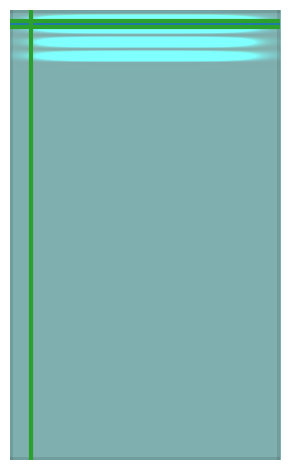

In [11]:
plt.figure()
grid.visualize(z=0)

In [12]:
Hs = bd.stack(grid.detectors[0].H, axis=0)
Es = bd.stack(grid.detectors[0].E, axis=0)
print(Hs.shape, Es.shape)

torch.Size([200, 968, 3]) torch.Size([200, 968, 3])


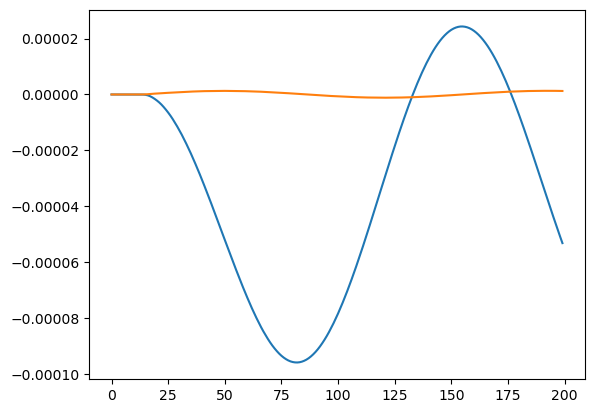

In [13]:
plt.plot(Hs[:, 45, 0])
plt.plot(Es[:, 45, 2]/200)

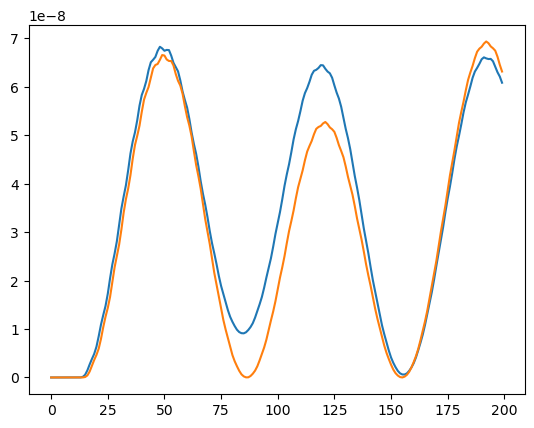

In [14]:
plt.plot(bd.sum(Hs[:, 45, :]**2, -1))

plt.plot(bd.sum(Es[:, 45, :]**2, -1))

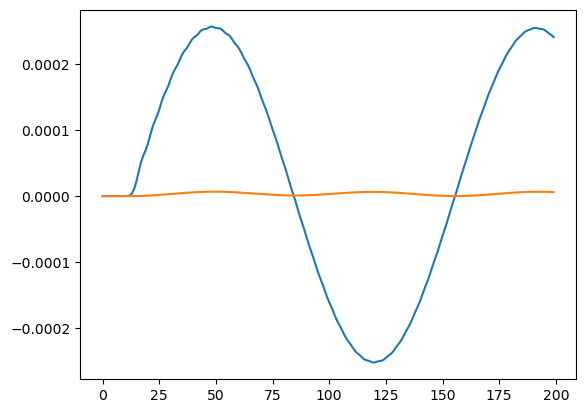

In [15]:
#plt.plot(Hs[:, 45, 0])
plt.plot(Hs[:, 45, 1])
#plt.plot(Hs[:, 45, 2])
plt.plot(bd.sum(Hs[:, 45, :]**2, -1)*100)

torch.Size([200, 1613, 3]) torch.Size([200, 1613, 3])


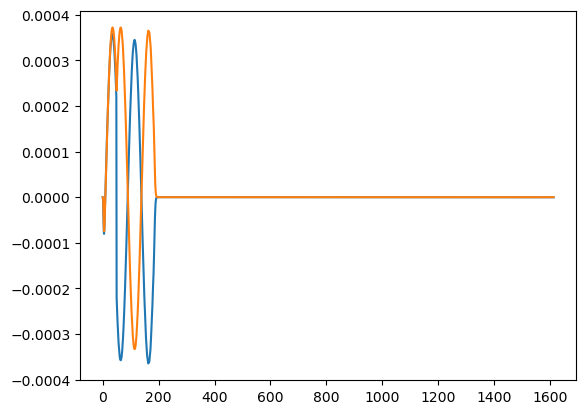

In [16]:
Hs = bd.stack(grid.detectors[1].H, axis=0)
Es = bd.stack(grid.detectors[1].E, axis=0)
print(Hs.shape, Es.shape)
plt.plot(Hs[199, :, 1])
plt.plot(Es[199, :, 2])


In [17]:
# for t in range(Hs.shape[0]):
#     plt.plot(Hs[t, :, 1])
#     plt.plot(Es[t, :, 2])
#     plt.figure()

<Figure size 640x480 with 0 Axes>

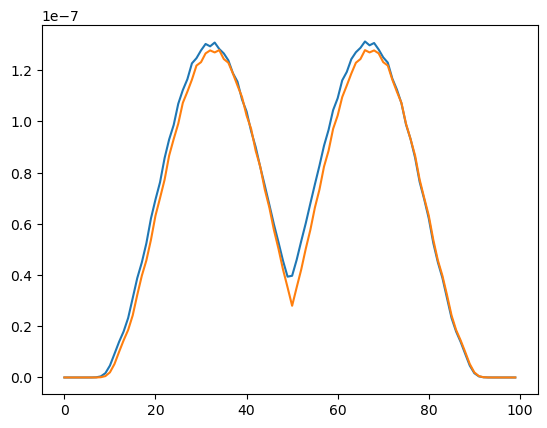

<Figure size 640x480 with 0 Axes>

In [18]:
    plt.plot(bd.sum(Hs[60, :, :]**2, -1)[:100])
    plt.plot(bd.sum(Es[60, :, :]**2, -1)[:100])
    #plt.plot(Es[60, :, 2])
    plt.figure()

In [19]:
Hs_top = bd.stack(grid.detectors[0].H, axis=0)
Es_top = bd.stack(grid.detectors[0].E, axis=0)
Hs_bot = bd.stack(grid.detectors[2].H, axis=0)
Es_bot = bd.stack(grid.detectors[2].E, axis=0)



In [20]:
Hs_top.shape

torch.Size([200, 968, 3])

In [21]:
Hs_bot.shape

torch.Size([200, 968, 3])

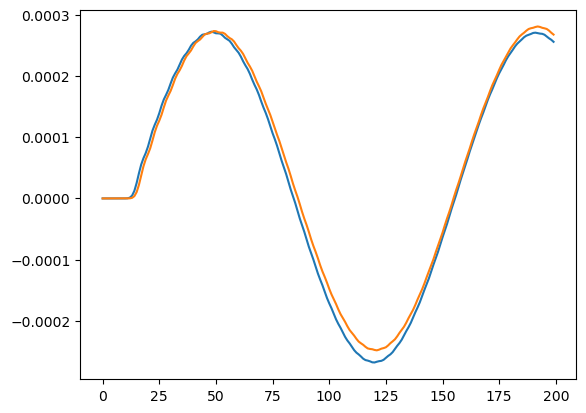

In [22]:
plt.plot(Hs_top[:, 50, 1])
plt.plot(Es_top[:, 50, 2])

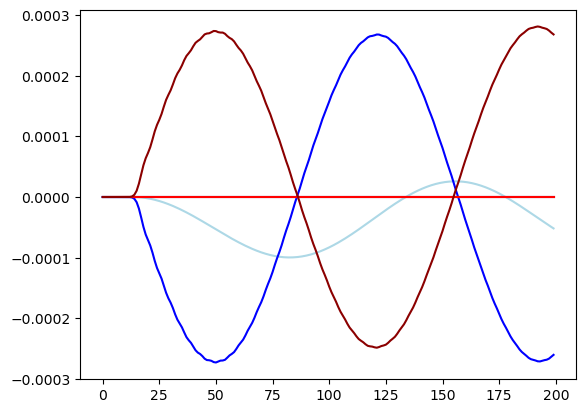

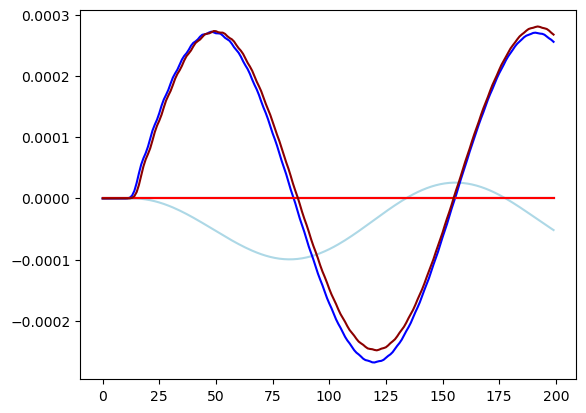

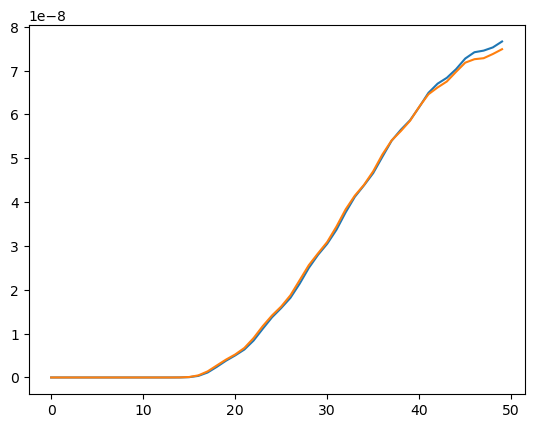

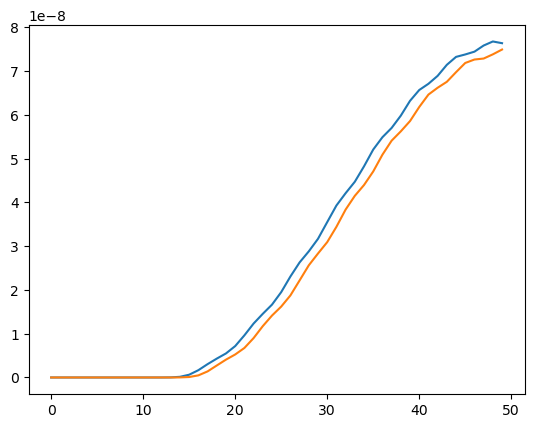

In [32]:
plt.plot(Hs_bot[:, 50, 0], color='lightblue')
plt.plot(Hs_bot[:, 50, 1], color='blue')
plt.plot(Hs_bot[:, 50, 2], color='darkblue')
plt.plot(Es_bot[:, 50, 0], color='pink' )
plt.plot(Es_bot[:, 50, 1], color='red' )
plt.plot(Es_bot[:, 50, 2], color='darkred' )

plt.figure()

plt.plot(Hs_top[:, 50, 0], color='lightblue')
plt.plot(Hs_top[:, 50, 1], color='blue')
plt.plot(Hs_top[:, 50, 2], color='darkblue')
plt.plot(Es_top[:, 50, 0], color='pink' )
plt.plot(Es_top[:, 50, 1], color='red' )
plt.plot(Es_top[:, 50, 2], color='darkred' )

plt.figure()

plt.plot(bd.sum(Hs_bot[:, 50, :]**2, -1)[:50])
plt.plot(bd.sum(Es_bot[:, 50, :]**2, -1)[:50])

plt.figure()

plt.plot(bd.sum(Hs_top[:, 50, :]**2, -1)[:50])
plt.plot(bd.sum(Es_top[:, 50, :]**2, -1)[:50])

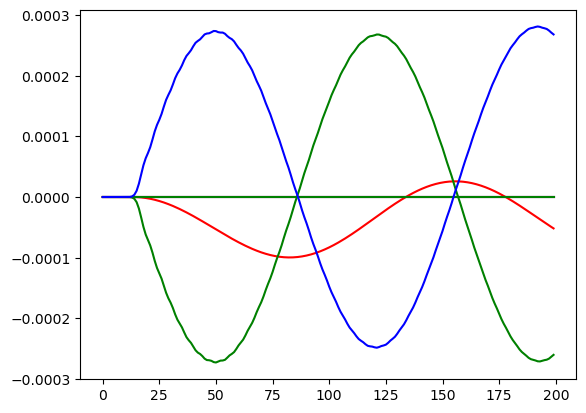

In [24]:
plt.plot(Hs_bot[:, 50, 0], color='red')
plt.plot(Hs_bot[:, 50, 1], color='green')
plt.plot(Hs_bot[:, 50, 2], color='blue')
plt.plot(Es_bot[:, 50, 0], color='red' )
plt.plot(Es_bot[:, 50, 1], color='green' )
plt.plot(Es_bot[:, 50, 2], color='blue' )